In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:

data = pd.read_csv("ICH_CAHPS_FACILITY.csv")

#print(data.head(3))

#print(data.columns)

#print(data.dtypes)

print(data.isnull().sum())


Provider Number                                                                     0
Network                                                                             0
Facility Name                                                                       0
Address Line 1                                                                      0
Address Line 2                                                                   6545
City                                                                                0
State                                                                               0
Zip                                                                                 0
County                                                                              0
Phone Number                                                                        0
Profit or Non-Profit                                                                1
Chain Owned                                           

In [3]:


facility_data = data.drop(["Provider Number", "Network", "Facility Name", "Address Line 1", "Address Line 2", "City", "State", "Zip", "County", "Phone Number",
                           "Chain Organization", "ICH-CAHPS date", "ICH-CAHPS data availability code", "Lower box percent of patients-nephrologists' communication and caring",
                           "Middle box percent of patients-nephrologists' communication and caring", "Top box percent of patients-nephrologists' communication and caring",
                           "Linearized score of nephrologists' communication and caring", "Lower box percent of patients-quality of dialysis center care and operations",
                           "Middle box percent of patients-quality of dialysis center care and operations", "Top box percent of patients-quality of dialysis center care and operations",
                           "Linearized score of quality of dialysis center care and operations"], axis = 1)

print(facility_data.columns)





Index(['Profit or Non-Profit', 'Chain Owned',
       'Star rating of nephrologists' communication and caring',
       'Star rating of quality of dialysis center care and operations',
       'Lower box percent of patients-providing information to patients ',
       'Top box percent of patients- providing information to patients',
       'Linearized score of providing information to patients',
       'Star rating of providing information to patients',
       'Lower box percent of patients-rating of the nephrologist ',
       'Middle box percent of patients- rating of the nephrologist',
       'Top box percent of patients- rating of the nephrologist',
       'Linearized score of rating of the nephrologist',
       'Star rating of the nephrologist',
       'Lower box percent of patients-rating of the dialysis center staff ',
       'Middle box percent of patients-rating of the dialysis center staff',
       'Top box percent of patients-rating of the dialysis center staff ',
       'Lineari

In [4]:

facility_data["Star rating of nephrologists' communication and caring"].fillna((facility_data["Star rating of nephrologists' communication and caring"].mean()), inplace=True)
facility_data["Star rating of quality of dialysis center care and operations"].fillna((facility_data["Star rating of quality of dialysis center care and operations"].mean()), inplace=True)
facility_data["Star rating of providing information to patients"].fillna((facility_data["Star rating of providing information to patients"].mean()), inplace=True)
facility_data["Star rating of the nephrologist"].fillna((facility_data["Star rating of the nephrologist"].mean()), inplace=True)
facility_data["Star rating of the dialysis center staff"].fillna((facility_data["Star rating of the dialysis center staff"].mean()), inplace=True)
facility_data["Star rating of the dialysis facility"].fillna((facility_data["Star rating of the dialysis facility"].mean()), inplace=True)
facility_data["Profit or Non-Profit"].fillna("Profit", inplace=True)

facility_data["Profit or Non-Profit"].replace("Profit", 1, inplace=True)
facility_data["Profit or Non-Profit"].replace("Non-profit", 0, inplace = True)


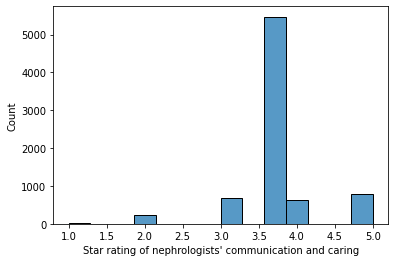

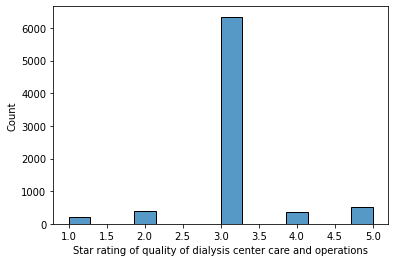

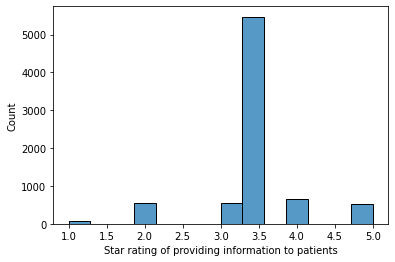

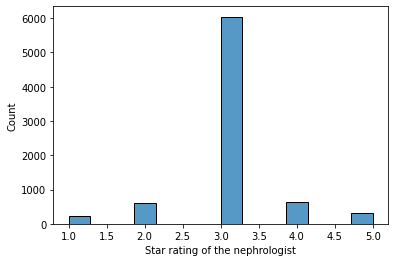

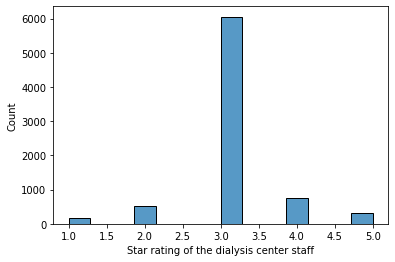

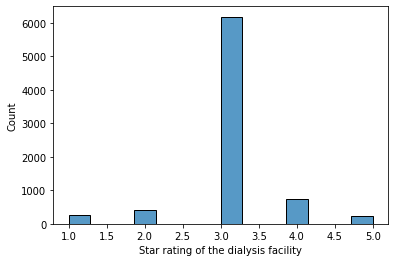

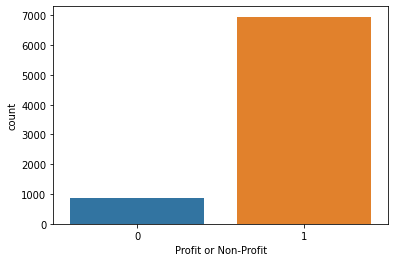

In [5]:
#Histogram plot of Star rating of nephrologists' communication and caring
sns.histplot(data =facility_data, x = "Star rating of nephrologists' communication and caring")
plt.show()

#Histogram plot of Star rating of quality of dialysis center care and operations
sns.histplot(data = facility_data, x = "Star rating of quality of dialysis center care and operations")
plt.show()

#Histogram plot of Star rating of providing information to patients
sns.histplot(data = facility_data, x ="Star rating of providing information to patients")
plt.show()

#Histogram plot of Star rating of the nephrologist
sns.histplot(data = facility_data, x = "Star rating of the nephrologist")
plt.show()

#Histogram plot of Star rating of the dialysis center staff
sns.histplot(data = facility_data, x = "Star rating of the dialysis center staff")
plt.show()

#Histogram plot of the Star rating of the dialysis facility
sns.histplot(data = facility_data, x = "Star rating of the dialysis facility")
plt.show()

#countplot of profit v non-profit
sns.countplot(data = facility_data, x = "Profit or Non-Profit")
plt.show()

In [6]:


X = facility_data[["Star rating of nephrologists' communication and caring", "Star rating of quality of dialysis center care and operations",
                  "Star rating of providing information to patients", "Star rating of the nephrologist", "Star rating of the dialysis center staff",
                  "Star rating of the dialysis facility"]]

Y = facility_data["Profit or Non-Profit"]

validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
  print(msg)

LR, -0.10839970242189849, 0.012736342125118595
LDA, -0.10839970242189849, 0.012736342125118595
KNN, -0.11063535981982256, 0.013226374227914431
CART, -0.12149186500960504, 0.01520105545101313
NB, -0.12659910013197387, 0.014857133529779647
SVM, -0.10839970242189849, 0.012736342125118595
